<h1>Data Generation Code</h1>

In [228]:
# Importing the files
import pandas as pd
import numpy as np
import seaborn as sns
from csv import writer
import random
import datetime
from faker import Faker
from faker.providers.phone_number import Provider

# Initializing the faker inctance
fake = Faker()

class IndiaPhoneNumberProvider(Provider):
    def india_phone_number(self):
        return f'{self.msisdn()[3:]}'

fake.add_provider(IndiaPhoneNumberProvider)

def generate_gstn():
    state_codes = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '96', '97']
    state_code = random.choice(state_codes)
    pan_number = generate_pan()
    check_digit = str(random.randint(0, 9))
    two_letters = fake.random_letters(length=2)
    gstn = state_code + pan_number + check_digit + "".join(two_letters).upper()
    return gstn

def generate_pan():
    five_letters = fake.random_letters(length=5)
    first_9_digits = "".join(five_letters).upper() + str(fake.random_number(digits=4))
    entity_types = ['P', 'C', 'F', 'L', 'T', 'N', 'R', 'E', 'J', 'G', 'H', 'K', 'A', 'B', 'Z', 'S', 'Y', 'D']
    entity_type = random.choice(entity_types)
    pan_number = first_9_digits + entity_type
    return pan_number

def get_random_time_of_the_day(day, month, year):
    fake_date = datetime.date(2023, 1, day)
    fake_time_str = fake.time()
    fake_time = datetime.datetime.strptime(fake_time_str, '%H:%M:%S').time()
    fake_datetime = datetime.datetime.combine(fake_date, fake_time)
    fake_datetime = fake_datetime.strftime('%Y-%m-%dT%H:%M:%S.%f')[:-3] + 'Z'
    return fake_datetime

def get_random_datetime():
    random_datetime = fake.date_time_this_year()
    datetime_string = random_datetime.strftime('%Y-%m-%dT%H:%M:%S.%f')[:-3] + 'Z'
    return datetime_string

def get_random_value(lower_limit, upper_limit, multiplier = 1, round_off_digits = 2):
    return round(random.uniform(lower_limit, upper_limit) * multiplier, round_off_digits)

def get_random_integer(lower_limit, upper_limit, multiplier = 1):
    return round(random.uniform(lower_limit, upper_limit) * multiplier)

def get_asset_id():
    five_letters = fake.random_letters(length=4)
    two_letters = fake.random_letters(length=2)
    five_numbers = str(fake.random.randint(10000, 100000))
    return '/' + "".join(five_letters).lower() + '/' + "".join(two_letters).lower() + five_numbers

def get_random_id_all_numbers(length = 5):
    return fake.random.randint(10**(length-1), 10**length)

def get_changed_time(date_and_time, minutes, seconds=0):
    dt = datetime.datetime.fromisoformat(date_and_time[:-1])
    dt += datetime.timedelta(minutes=minutes, seconds=seconds)
    changed_time_and_date = dt.strftime('%Y-%m-%dT%H:%M:%S.%f')[:-3] + 'Z'
    return changed_time_and_date

def get_invoice_identifier():
    company_abbreviation = 'NMC'
    five_digits = str(fake.random.randint(10000, 100000))
    eight_digits = str(fake.random.randint(10000000, 100000000))
    return company_abbreviation + "_" + five_digits + "_" + eight_digits

def get_type(item_list):
    item = random.choice(item_list)
    return item

# def get_charge_station_name():
#     three_letters = fake.random_letters(length=3)
#     return "".join(three_letters).lower() + str(random.randint(1, 10))

charge_station_city_dict = {'sdg5': 'Mysore', 'hmk7': 'Chennai', 'sft4': 'Bangalore'}
charge_station_state_dict = {'Bangalore': 'Karnataka', 'Mysore': 'Karnataka', 'Chennai': 'Tamil Nadu'}

# Generating fake data for 31 days with random number of rows for each day
for day in range(1, 32):
    df = pd.read_csv('csv_summary_30.csv')
    for i in range(random.randint(10, 50)):
        txn_id = fake.uuid4()
        asset_id = get_asset_id()
        auth_mode = random.choice(["RFID", "APP"])
        amount = get_random_value(1, 10, round_off_digits=2)
        charge_point_id = asset_id[6:]
        charge_station_address = fake.address()
        charge_station_name = get_type(['sdg5', 'hmk7', 'sft4'])
        charge_station_city = charge_station_city_dict[charge_station_name]
        charge_station_state = charge_station_state_dict[charge_station_city]
        bussiness_entity_address = get_type(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai', 'Ranchi'])
        account_bussiness_entity_gstn = generate_gstn()
        account_bussiness_entity_pan = generate_pan()
        invoiced_end_meter = get_random_integer(1, 2, 1000)
        start_at_time = np.NaN
        connector_id = round(random.randint(1, 3))
        connector_type = get_type(['Type 1', 'Type 2'])
        creation_at_time = get_random_time_of_the_day(day, 1, 2023)
        tags = np.NaN
        delivered_min = get_random_value(0.1, 0.2, 10, 2)
        delivered_wh = get_random_integer(0.5, 1, 2000)
        id_tag = get_type(['DEVA-TEST'])
        numo_type = asset_id[1:5]
        services_0_name = np.NaN
        services_0_currency = np.NaN
        services_0_type = get_type(['energyInkWh'])
        services_0_rate = get_random_integer(4, 8)
        services_0_taxinfo_0_value = 18 # 18% tax
        services_0_taxinfo_0_name = get_type(['GST'])
        services_0_taxinfo_0_tax_amount = get_random_value(0.5, 0.99, round_off_digits=3)
        services_0_taxinfo_1_value = np.NaN
        services_0_taxinfo_1_name = np.NaN
        services_0_taxinfo_1_tax_amount = np.NaN
        services_0_amount = amount
        services_0_tax_amount = services_0_amount * (services_0_taxinfo_0_value / 100)
        services_0_total = round(services_0_amount + services_0_tax_amount, 3)
        services_1_name = np.NaN
        services_1_currency = np.NaN
        services_1_type = get_type(["serviceFee"])
        services_1_rate = 0
        services_1_taxinfo_0_value = 18 # 18% tax
        services_1_taxinfo_0_name = get_type(['GST'])
        services_1_taxinfo_0_tax_amount = 0
        services_1_taxinfo_1_value = 0
        services_1_taxinfo_1_name = 0
        services_1_taxinfo_1_tax_amount = 0
        services_1_amount = 0
        services_1_tax_amount = services_1_amount * (services_1_taxinfo_0_value / 100)
        services_1_total = round(services_1_amount + services_1_tax_amount, 3)
        session_id = txn_id
        session_type = get_type(['charging'])
        station_bussiness_entity_GST = np.NaN
        station_bussiness_entity_PAN = np.NaN
        station_bussiness_entity_address = np.NaN
        support_email = fake.ascii_free_email()
        support_number = fake.india_phone_number()
        total_amount = services_0_amount + services_1_amount
        total_tax = services_0_tax_amount + services_1_tax_amount
        transaction_id = get_random_id_all_numbers(8)
        stop_at_time = get_changed_time(creation_at_time, 2)
        updated_at_time = get_changed_time(stop_at_time, 0, 1)
        stop_request_at_time = np.NaN
        stop_request_target = np.NaN
        stop_request_req = np.NaN
        stop_request_session_id = np.NaN
        stop_request_origin = np.NaN
        stop_request_reason = np.NaN
        stop_request_message_id = np.NaN
        charge_station_id = get_random_integer(1, 10)
        invoice_identifier = get_invoice_identifier()
        invoice_account_id = fake.uuid4()
        invoice_amount = np.NaN
        invoice_currency = get_type(['INR'])
        invoice_description = 'Charging Summary'
        invoice_entry_type = get_type(['debit'])
        invoice_username = fake.user_name()
        invoice_success = get_type(['success'])
        invoice_type = get_type(['chargeIntimation'])

        df.loc[len(df)] = [
        txn_id, asset_id, auth_mode, amount, charge_point_id, charge_station_address, charge_station_name, charge_station_city, charge_station_state,
        bussiness_entity_address, account_bussiness_entity_gstn, account_bussiness_entity_pan, invoiced_end_meter, start_at_time, connector_id, 
        connector_type, creation_at_time, tags, delivered_min, delivered_wh, id_tag, numo_type, services_0_name, services_0_currency, services_0_type, 
        services_0_rate, services_0_taxinfo_0_value, services_0_taxinfo_0_name, services_0_taxinfo_0_tax_amount, services_0_taxinfo_1_value,
        services_0_taxinfo_1_name, services_0_taxinfo_1_tax_amount, services_0_amount, services_0_tax_amount, services_0_total, services_1_name, 
        services_1_currency, services_1_type, services_1_rate, services_1_taxinfo_0_value, services_1_taxinfo_0_name, services_1_taxinfo_0_tax_amount, 
        services_1_taxinfo_1_value, services_1_taxinfo_1_name, services_1_taxinfo_1_tax_amount, services_1_amount, services_1_tax_amount,
        services_1_total, session_id, session_type, station_bussiness_entity_GST, station_bussiness_entity_PAN, station_bussiness_entity_address,
        support_email, support_number, total_amount, total_tax, transaction_id, updated_at_time, stop_at_time, stop_request_at_time, stop_request_target,
        stop_request_req, stop_request_session_id, stop_request_origin, stop_request_reason, stop_request_message_id, charge_station_id, invoice_identifier,
        invoice_account_id, invoice_amount, invoice_currency, invoice_description, invoice_entry_type, invoice_username, invoice_success, invoice_type
        ]

    # create csv file for the particular day
    df[1:].to_csv(f'day_{day}.csv', index=False)

<h1>Data Visualization</h1>

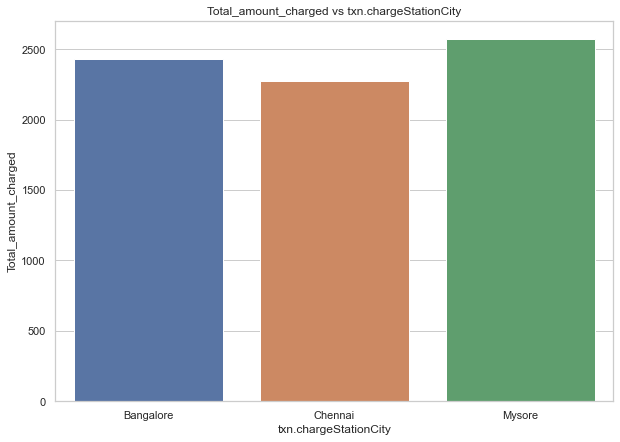

C:\Users\Naveen\AppData\Local\Temp/ipykernel_16564/2113842814.py:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



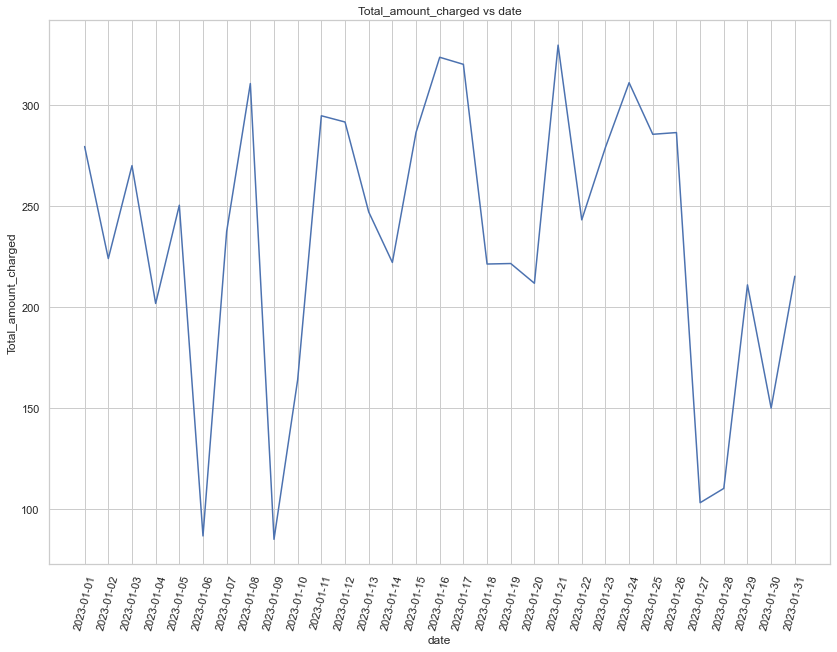

C:\Users\Naveen\AppData\Local\Temp/ipykernel_16564/2113842814.py:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



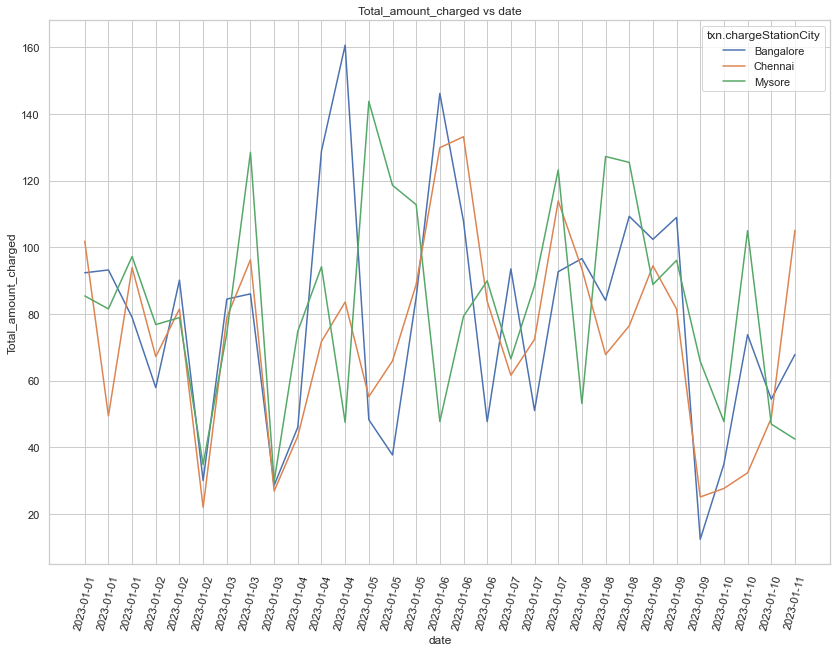

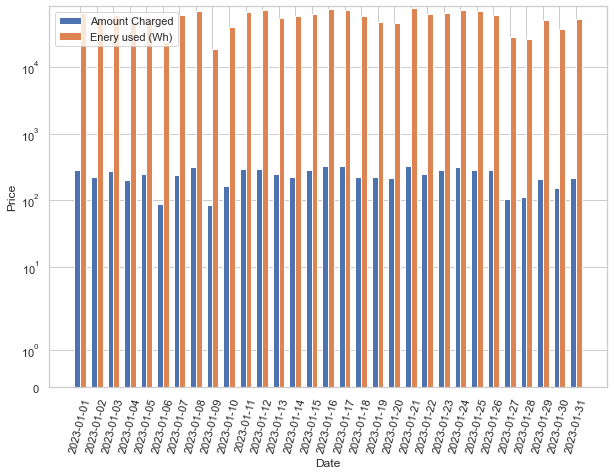

In [347]:
# Importing the files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def bar_plot(data, x, y, figsize=(10, 7)):
    plt.subplots(figsize=figsize)
    fig = sns.barplot(data=data, x='txn.chargeStationCity', y='Total_amount_charged')
    fig.set_title(f'{y} vs {x}')
    plt.show()

def line_plot(data, x, y, rotation=0, figsize=(10, 7), hue=None):
    plt.subplots(figsize=figsize)
    fig = sns.lineplot(data=data, x='date', y='Total_amount_charged', hue=hue)
    fig.set_xticklabels(labels=data['date'], rotation=rotation)
    fig.set_title(f'{y} vs {x}')
    plt.show()

def plot_amount_vs_energy(data, x, col1, col2, figsize=(10, 7)):
    df_date_vs_amount_watthr_temp = pd.DataFrame(data).set_index(x)

    x = np.arange(len(df_date_vs_amount_watthr_temp.index))
    bar_width = 0.35

    plt.subplots(figsize=figsize)
    plt.bar(x, df_date_vs_amount_watthr_temp[col1], bar_width, label='Amount Charged')
    plt.bar(x + bar_width, df_date_vs_amount_watthr_temp[col2], bar_width, label='Enery used (Wh)')
    plt.xticks(x + bar_width/2, df_date_vs_amount_watthr_temp.index, rotation=75)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.yscale('symlog')
    plt.show()

# Create an empty dataframe
df = pd.DataFrame()

# Process all the files in that month
for i in range(1, 32):
    # Load datasets one at a time by their day
    df_temp = pd.read_csv(f'day_{i}.csv')

    # Drop unwanted columns
    df_temp.drop(columns=['txn.identifier', 'txn.assetIdentifier', 'txn.authMode', 'txn.amount', 'txn.chargePointId', 
    'txn.accountBusinessEntity.gstn', 'txn.accountBusinessEntity.pan', 'txn.start.atTime', 'txn.connectorId', 'txn.tags','txn.idTag', 'txn.numotype',
    'txn.services.0.name', 'txn.services.0.currency', 'txn.services.0.type', 'txn.services.0.rate', 'txn.services.0.taxInfo.0.value',
    'txn.services.0.taxInfo.0.name', 'txn.services.0.taxInfo.0.taxAmount', 'txn.services.0.taxInfo.1.value', 'txn.services.0.taxInfo.1.name',
    'txn.services.0.taxInfo.1.taxAmount', 'txn.services.0.amount', 'txn.services.0.taxAmount', 'txn.services.0.total',
    'txn.services.1.name', 'txn.services.1.currency', 'txn.services.1.type', 'txn.services.1.rate', 'txn.services.1.taxInfo.0.value',
    'txn.services.1.taxInfo.0.name', 'txn.services.1.taxInfo.0.taxAmount', 'txn.services.1.taxInfo.1.value', 'txn.services.1.taxInfo.1.name',
    'txn.services.1.taxInfo.1.taxAmount', 'txn.services.1.amount', 'txn.services.1.taxAmount', 'txn.services.1.total', 'txn.sessionId',
    'txn.sessionType', 'txn.stationBusinessEntity.GST', 'txn.stationBusinessEntity.PAN', 'txn.stationBusinessEntity.Address',
    'txn.supportEmail', 'txn.supportNumber', 'txn.transactionId', 'txn.stopRequest.atTime', 'txn.stopRequest.target', 'txn.stopRequest.request', 
    'txn.stopRequest.sessionId', 'txn.stopRequest.origin', 'txn.stopRequest.reason', 'txn.stopRequest.messageId', 'txn.chargeStationId', 
    'inv.identifier', 'inv.accountId', 'inv.currency', 'inv.description', 'inv.entryType', 'inv.userName', 'inv.status', 'inv.invoiceType'], inplace=True)

    df_temp['Total_amount_charged'] = df_temp['txn.totalAmount'] + df_temp['txn.totalTax']
    df_temp['date'] = df_temp['txn.updatedAtTime'].apply(lambda x: x[:10])

    df = pd.concat([df, df_temp], axis = 0)

df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)

# Create multiple dataframes suitable for plotting different columns
df_city_vs_totalAmount = df.groupby(['txn.chargeStationCity']).agg({'Total_amount_charged': 'sum'}).reset_index()
df_date_vs_totalAmount = df.groupby(['date']).agg({'Total_amount_charged': 'sum'}).reset_index()
df_date_vs_totalAmount_cs = df.groupby(['date', 'txn.chargeStationCity']).agg({'Total_amount_charged': 'sum'}).reset_index()
df_date_vs_amount_watthr = df.groupby(['date']).agg({'Total_amount_charged': 'sum', 'txn.deliveredWh': 'sum'}).reset_index()

# Plots
bar_plot(df_city_vs_totalAmount, 'txn.chargeStationCity', 'Total_amount_charged')
line_plot(df_date_vs_totalAmount, 'date', 'Total_amount_charged', 75, figsize=(14, 10))
line_plot(df_date_vs_totalAmount_cs, 'date', 'Total_amount_charged', 75, figsize=(14, 10), hue='txn.chargeStationCity')
plot_amount_vs_energy(df_date_vs_amount_watthr, 'date', 'Total_amount_charged', 'txn.deliveredWh')
